# GDELT 1.0 Event  database

# Info

This notebook performs a basic inspection of the GDELT event file. Please refer to `documentation/GDELT_1.0_EVENTS.md` for a brief overview of the structure of the files. Or the [full documentaiton provided by the creators of the database.](http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf)

# Download data

Individual files for a single day are in the order of **megabytes** therefore can be explored locally, on a user machine, without the need of a cluster or distributed spark solutions.

Download an example of one day's recording of events:

In [22]:
!mkdir -p tmp_data
!wget http://data.gdeltproject.org/events/20200329.export.CSV.zip -O tmp_data/20200329.export.CSV.zip
!unzip -o tmp_data/20200329.export.CSV.zip -d tmp_data/ 

--2020-03-31 10:04:43--  http://data.gdeltproject.org/events/20200329.export.CSV.zip
Resolving data.gdeltproject.org (data.gdeltproject.org)... 172.217.10.48, 2607:f8b0:4006:805::2010
Connecting to data.gdeltproject.org (data.gdeltproject.org)|172.217.10.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5758423 (5.5M) [application/zip]
Saving to: ‘tmp_data/20200329.export.CSV.zip’

tmp_data/20200329.e 100%[===================>]   5.49M  6.02MB/s    in 0.9s    

2020-03-31 10:04:44 (6.02 MB/s) - ‘tmp_data/20200329.export.CSV.zip’ saved [5758423/5758423]

Archive:  tmp_data/20200329.export.CSV.zip
  inflating: tmp_data/20200329.export.CSV  


Download appropriate header name. See the above link and references explaining these header names, its meaning and types.

In [24]:
!wget https://www.gdeltproject.org/data/lookups/CSV.header.dailyupdates.txt -O tmp_data/gdelt_headers.txt

--2020-03-31 10:06:43--  https://www.gdeltproject.org/data/lookups/CSV.header.dailyupdates.txt
Resolving www.gdeltproject.org (www.gdeltproject.org)... 66.96.149.28
Connecting to www.gdeltproject.org (www.gdeltproject.org)|66.96.149.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 893 [text/plain]
Saving to: ‘tmp_data/gdelt_headers.txt’

tmp_data/gdelt_head 100%[===================>]     893  --.-KB/s    in 0s      

2020-03-31 10:06:43 (207 MB/s) - ‘tmp_data/gdelt_headers.txt’ saved [893/893]



# Load data

**Note** although the files is in **CSV** (comma-separated values), they are in reality separated by tabulature ('\t'):


In [34]:
! head -n 1 tmp_data/20200329.export.CSV

915145392	20190330	201903	2019	2019.2466	HND	HONDURAS	HND								USA	UNITED STATES	USA								0	043	043	04	1	2.8	4	2	4	1.37607114859569	1	Honduras	HO	HO	15	-86.5	HO	2	New York, United States	US	USNY	42.1497	-74.9384	NY	1	Honduras	HO	HO	15	-86.5	HO	20200329	https://www.etonline.com/ben-higgins-is-engaged-to-girlfriend-jessica-clarke-see-the-photos-exclusive-143820


In [64]:
import pandas as pd

# Load data
data = pd.read_csv("tmp_data/20200329.export.CSV", sep='\t', header=None)

# Load headers
f = open('tmp_data/gdelt_headers.txt', 'r')
headers = f.readline()
headers = headers.split("\t")
headers = [x.strip() for x in headers]

f.close()

# Test
assert len(headers)== len(data.columns)

# Inject headers names
data.columns = headers

# Show
data

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,915145392,20190330,201903,2019,2019.2466,HND,HONDURAS,HND,NaN,NaN,...,NY,1,Honduras,HO,HO,15.0000,-86.5000,HO,20200329,https://www.etonline.com/ben-higgins-is-engage...
1,915145393,20190330,201903,2019,2019.2466,HND,HONDURAS,HND,NaN,NaN,...,NY,2,"New York, United States",US,USNY,42.1497,-74.9384,NY,20200329,https://www.etonline.com/ben-higgins-is-engage...
2,915145394,20190330,201903,2019,2019.2466,SAU,RIYADH,SAU,NaN,NaN,...,NaN,4,"Riyadh, Ar Riya?, Saudi Arabia",SA,SA10,24.6408,46.7728,-3093009,20200329,https://www.1310news.com/2020/03/28/saudi-forc...
3,915145395,20190330,201903,2019,2019.2466,USA,UNITED STATES,USA,NaN,NaN,...,HO,1,Honduras,HO,HO,15.0000,-86.5000,HO,20200329,https://www.etonline.com/ben-higgins-is-engage...
4,915145396,20190330,201903,2019,2019.2466,USA,UNITED STATES,USA,NaN,NaN,...,NY,2,"New York, United States",US,USNY,42.1497,-74.9384,NY,20200329,https://www.etonline.com/ben-higgins-is-engage...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87396,915276335,20200329,202003,2020,2020.2438,nav,NAVAJO,NaN,NaN,nav,...,AZ,2,"Arizona, United States",US,USAZ,33.7712,-111.3880,AZ,20200329,https://www.azcentral.com/story/news/local/ari...
87397,915276336,20200329,202003,2020,2020.2438,nav,NAVAJO,NaN,NaN,nav,...,AZ,2,"Arizona, United States",US,USAZ,33.7712,-111.3880,AZ,20200329,https://www.azcentral.com/story/news/local/ari...
87398,915276337,20200329,202003,2020,2020.2438,nav,NAVAJO,NaN,NaN,nav,...,AZ,2,"Arizona, United States",US,USAZ,33.7712,-111.3880,AZ,20200329,https://www.azcentral.com/story/news/local/ari...
87399,915276338,20200329,202003,2020,2020.2438,nav,NAVAJO,NaN,NaN,nav,...,AZ,2,"Arizona, United States",US,USAZ,33.7712,-111.3880,AZ,20200329,https://www.azcentral.com/story/news/local/ari...


# EDA
Basic Exploratory Data Analysis for the purpose of **data cleaning** is relevant to task at hand. Focus is put on data consistency, and building intuition for upcoming data sets.

Below tests can be easily done in Pandas environment, but serve here as a skeleton for later automated checks in SQL and Apache Airflow.

## Case #1: Missing data

At this stage of modelling we know that there shouldn't be any duplicated in event IDs.

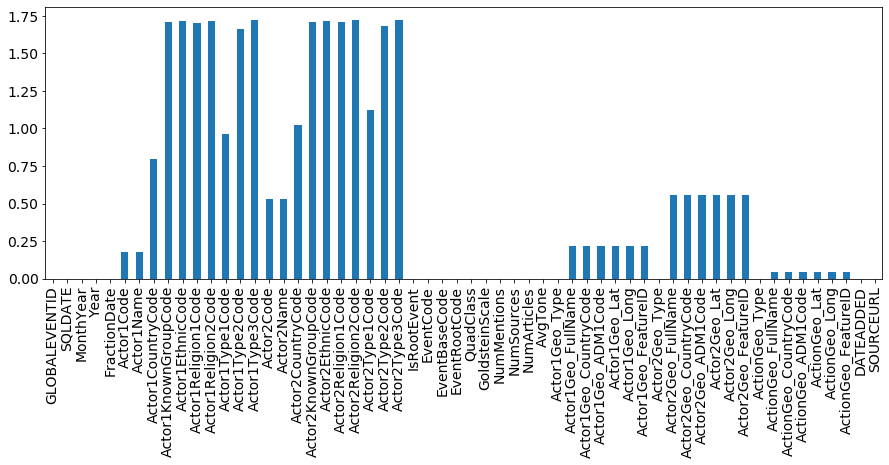

In [125]:
# How many NA values we have per column in % PERCENTAGES


import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,5))
NAs_per_column = data.isna().sum()
NAs_per_column_norm = NAs_per_column*100/data.size
NAs_per_column_norm.plot(kind='bar',logy=False)

ax.tick_params(axis='both', which='major', labelsize=14)
 

#NAs_per_column.plot(kind='bar',logy=True)

Majority of entries have all values present, alhough also majority of columns have **some values** missing. 

We'll store **all information** present that has unique `GLOBALEVENTID` for a given `SQLDATE`:

## Case #2: Duplicates

In [132]:
# Basic check
    # No entry should be duplicated
assert data[data.duplicated()].size==0

In [133]:
# less general basic check: 
    # no global event ID should be duplicated (for a given date)
assert data[data.duplicated(['GLOBALEVENTID','SQLDATE'])].size == 0